In [1]:
#Import all required libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

In [2]:
# Load Data file
data = pd.read_excel('Sea level data/Mumbai_India.xlsx')

x = data.iloc[:,0] #first row: years
y = data.iloc[:,1] #second row: sea level
L = len(data)

In [3]:
# Make a matrix with the time information (x is years)
matrix = (x, np.ones((L,1)))

In [4]:
# Build Model based on y = ax + b + Error
x_mean= np.mean(x)
y_mean= np.mean(y)

#   METHOD 1: Compute Equation Manually
#numerator= 0
#denominator= 0
#for i in range(len(x)):
#    numerator   += (x[i] - x_mean)*(y[i] - y_mean)
#    denominator += (x[i] - x_mean)**2
#a = numerator/denominator
#b = y_mean - a*x_mean

#print(a,b)
#prediction = a*x + b
#plt.subplot(2,2,1)
#plt.plot(x,y)
#plt.plot([min(x),max(x)], [min(prediction), max(prediction)], color='red') #trend line

0.6790348891892354 5698.680121196309


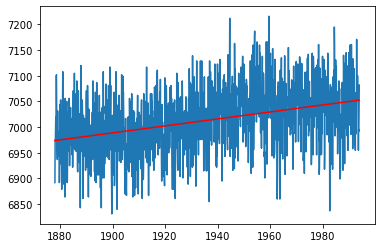

In [5]:
#   METHOD 2: Use Numpy's polynomial fit function
parameters = np.polyfit(x,y, deg = 1) #Linear trend is a polynomial of degree 1
(a,b) = parameters
trend = a*x + b

print(a,b)
plt.plot(x,y)
plt.plot(x,trend, label='Polyfit Trend Line', color ='red')

#plt.legend()
#plt.show()
# remember data is given in mm/month so convert estimates to mm/yr

0.6790348891892363 5698.680121196305


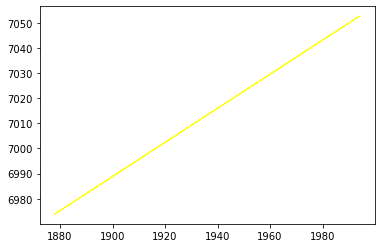

In [6]:
#   METHOD 3: Least Squares
# Rewrite the line equation as y = Ap, where A = [[x 1]] and p = [[m], [c]]

A = np.vstack([x, np.ones(L)]).T
m,c = np.linalg.lstsq(A,y, rcond=None)[0]

print(m,c)
line = m*x+c
plt.plot(x,line, label='Least Squares Trend Line', color='yellow')

No handles with labels found to put in legend.


CI95 of the slope is [0.6790348891892354, 0.6790348891892354]
CI99 of the slope is [0.6790348891892354, 0.6790348891892354]
CI99 of the trend line is [6974.723092017911, 7052.647442388255]


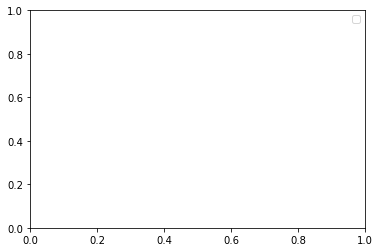

In [7]:
# Confidence Intervals

CI95 = [np.percentile(a,2.5), np.percentile(a,97.5)] #97.5 - 2.5 = 95.
print('CI95 of the slope is', CI95) #95% chance that the parameter (coefficient of x the slope of trend line) lies within the 2 output values

CI99a = [np.percentile(a,1), np.percentile(a,100)] #100 - 1 = 99
print('CI99 of the slope is', CI99a)

CI99trend = [np.percentile(trend,1), np.percentile(trend,100)]
print('CI99 of the trend line is', CI99trend)

#plt.plot(x,)
plt.legend()
plt.show()
